In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import os

## Load data

In [2]:
df = pd.read_csv('data/from_gov.csv')

In [3]:
url_list = list(df[['URL', 'FileName']].itertuples(index=False, name=None))

In [ ]:
for url,name in url_list:
    response = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(response.content))
    z.extractall(name)

In [66]:
with open('url_list.pickle','wb') as f:
    pickle.dump(url_list,f)

In [5]:
with open('url_list.pickle','rb') as f:
    url_list = pickle.load(f)

In [7]:
save_path = 'zip_list.pickle'
with open(save_path,'rb') as f:
    zip_list = pickle.load(f)

name_list,adf_files = [],[]
for adf_file,name in zip_list:
    name_list.append(name)
    adf_files.append(adf_file)

In [8]:
len(adf_files)

28

In [10]:
data_dict = {}

for adf_file,name in zip(adf_files,name_list):
    save_path = f'processed_data/data_for_{name}.pickle'
    with open(save_path,'rb') as f:
        geo_data = pickle.load(f)
    data_dict[name] = geo_data[:10812,:10812]

In [13]:
data_dict['n40w104'].shape

(10812, 10812)

## Scale down

In [14]:
small_dict = {}

for key in data_dict:
    data = data_dict[key]
    small_dict[key] = data[::4,::4]

In [15]:
small_dict['n40w104'].shape

(2703, 2703)

In [10]:
x = data_dict['n38w106']

In [16]:
def name_to_coord(name):
    y,x = int(name[1:3]),int(name[4:])
    y -= 38
    x -= 103
    x = abs(x-7) - 1
    return x,y

In [17]:
name_to_coord('n39w109')

(0, 1)

In [18]:
segment = int(10812 / 4)
state = np.zeros((7*segment,4*segment))

for key in small_dict:
    data = small_dict[key]
    x,y = name_to_coord(key)
    state[x*segment:(x+1)*segment,y*segment:(y+1)*segment] = np.rot90(data,k=3)

In [19]:
state.shape

(18921, 10812)

In [19]:
with open('save_state.pickle','wb') as f:
    pickle.dump(state,f)

In [21]:
with open('save_state.pickle','rb') as f:
    state = pickle.load(f)

In [22]:
scale = 50
state_small = state[::scale,::scale]

In [23]:
state_small.shape

(379, 217)

In [25]:
x1 = small_dict['n40w104']
x2 = small_dict['n40w103']

In [26]:
x1.shape

(2703, 2703)

## Plot some examples

In [62]:
segment = 2703
ex = np.zeros((2*segment,1*segment))
x,y = 0,0
ex[x*segment:(x+1)*segment,y*segment:(y+1)*segment] = np.rot90(x1,k=3)
x,y = 1,0
ex[x*segment:(x+1)*segment,y*segment:(y+1)*segment] = np.rot90(x2,k=3)

In [63]:
ex.shape

(5406, 2703)

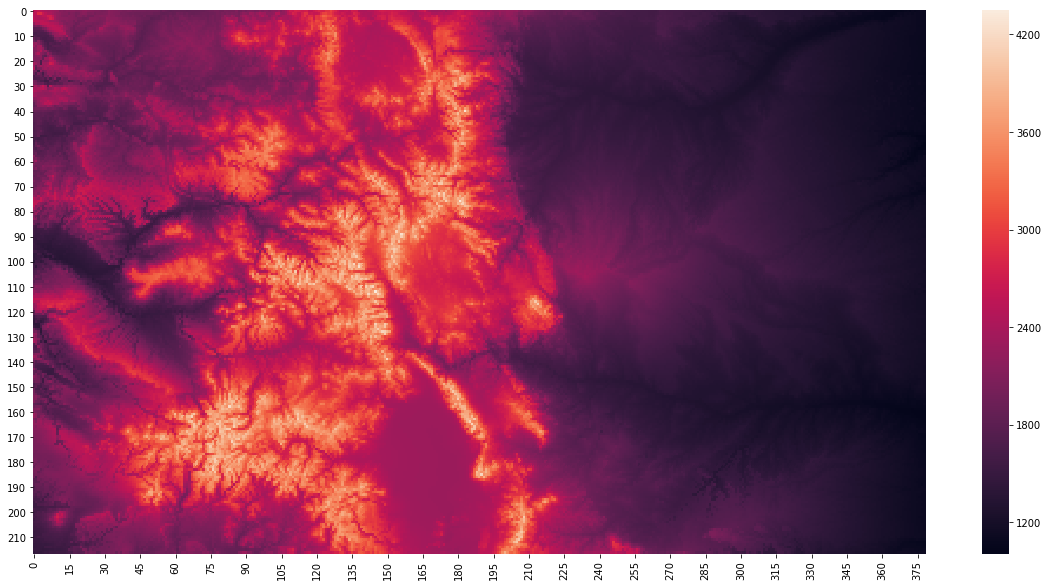

In [27]:
sns.heatmap(np.flipud(state_small.T))
fig = plt.gcf()
fig.set_size_inches(20,10)

In [100]:
name = 'n41w103'
save_path = f'processed_data/data_for_{name}.pickle'

In [101]:
with open(save_path,'rb') as f:
    geo_data = pickle.load(f)

In [102]:
geo_data[0]

array([1331.7102, 1331.5884, 1331.5261, ..., 1098.2753, 1098.2219,
       1098.3553], dtype=float32)

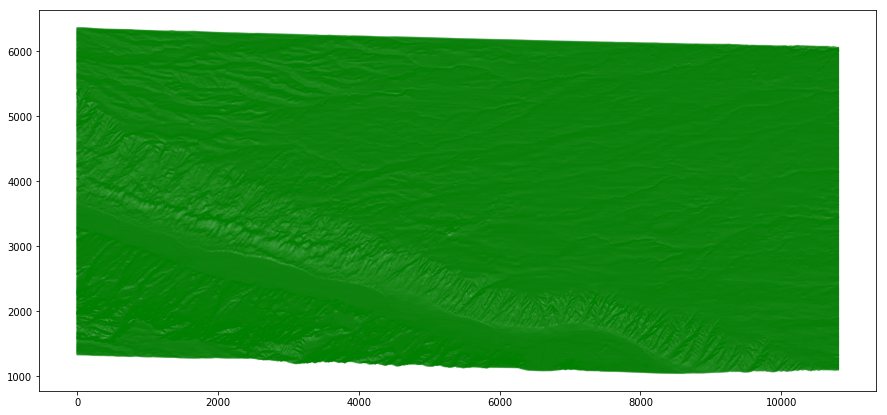

In [103]:
for i in range(0,5000,1):
    plt.plot(geo_data[i] + i * 1,c='green',alpha=.1)
    
fig = plt.gcf()
fig.set_size_inches(15,7)

In [86]:
os.path.getsize(save_path) / 10 ** 9

0.467597538

In [105]:
from mpl_toolkits import mplot3d

In [330]:
scale = 100
state_small = state[::scale,::scale]

In [331]:
state_small.shape

(190, 109)

In [122]:
x = range(state_small.shape[1])
y = range(state_small.shape[0])
X, Y = np.meshgrid(x, y)
Z = state_small

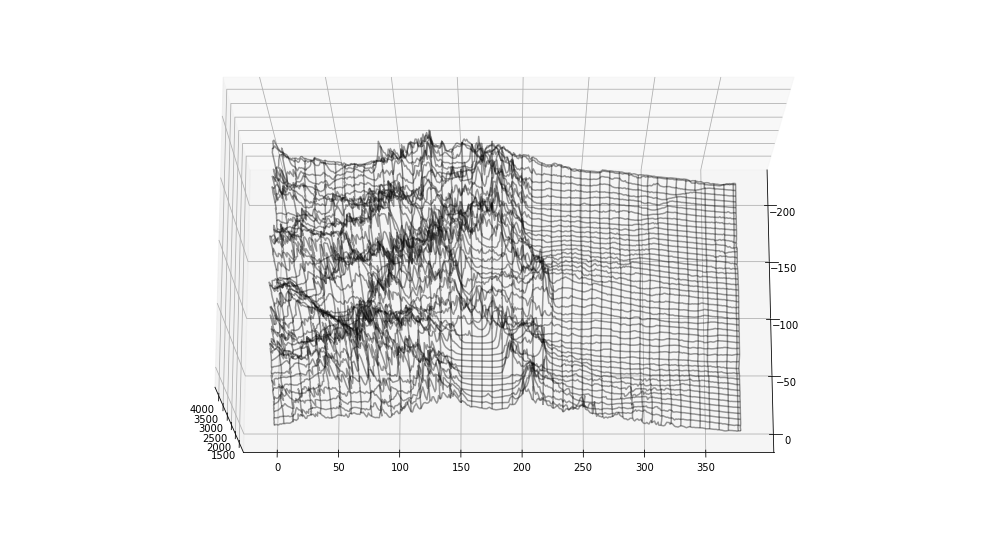

In [181]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(-X, Y, Z, color='black',alpha=.4,)

fig = plt.gcf()
zoom = 2.5
fig.set_size_inches(7*zoom,4*zoom)

ax.view_init(75, 0)

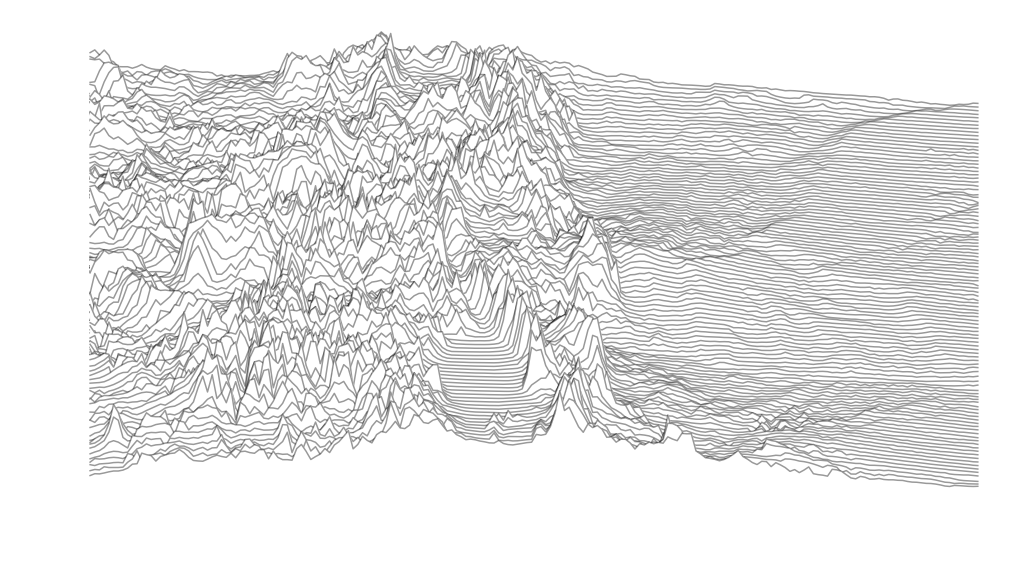

In [337]:
## original
for idx in range(0,state_small.shape[1],1):
    factor = 100
    
    y_plt = state_small[:,idx] + idx * factor
    x_plt = range(y_plt.shape[0])
    plt.plot(x_plt,y_plt,c='black',alpha=.4,zorder=-idx)
    plt.fill_between(x_plt,y_plt,y2=0, interpolate=True, color='black',zorder=-idx)


fig,ax = plt.gcf(),plt.gca()
zoom = 2.5
fig.set_size_inches(7*zoom,4*zoom)
_ = plt.axis('off')

In [30]:
state.shape

(18921, 10812)

In [31]:
scale_1,scale_2 = 10,40

scaled = state[::scale_1,::scale_2]

In [28]:
scale = 35
state_small = state[::scale,::scale]

In [32]:
scaled.shape

(1893, 271)

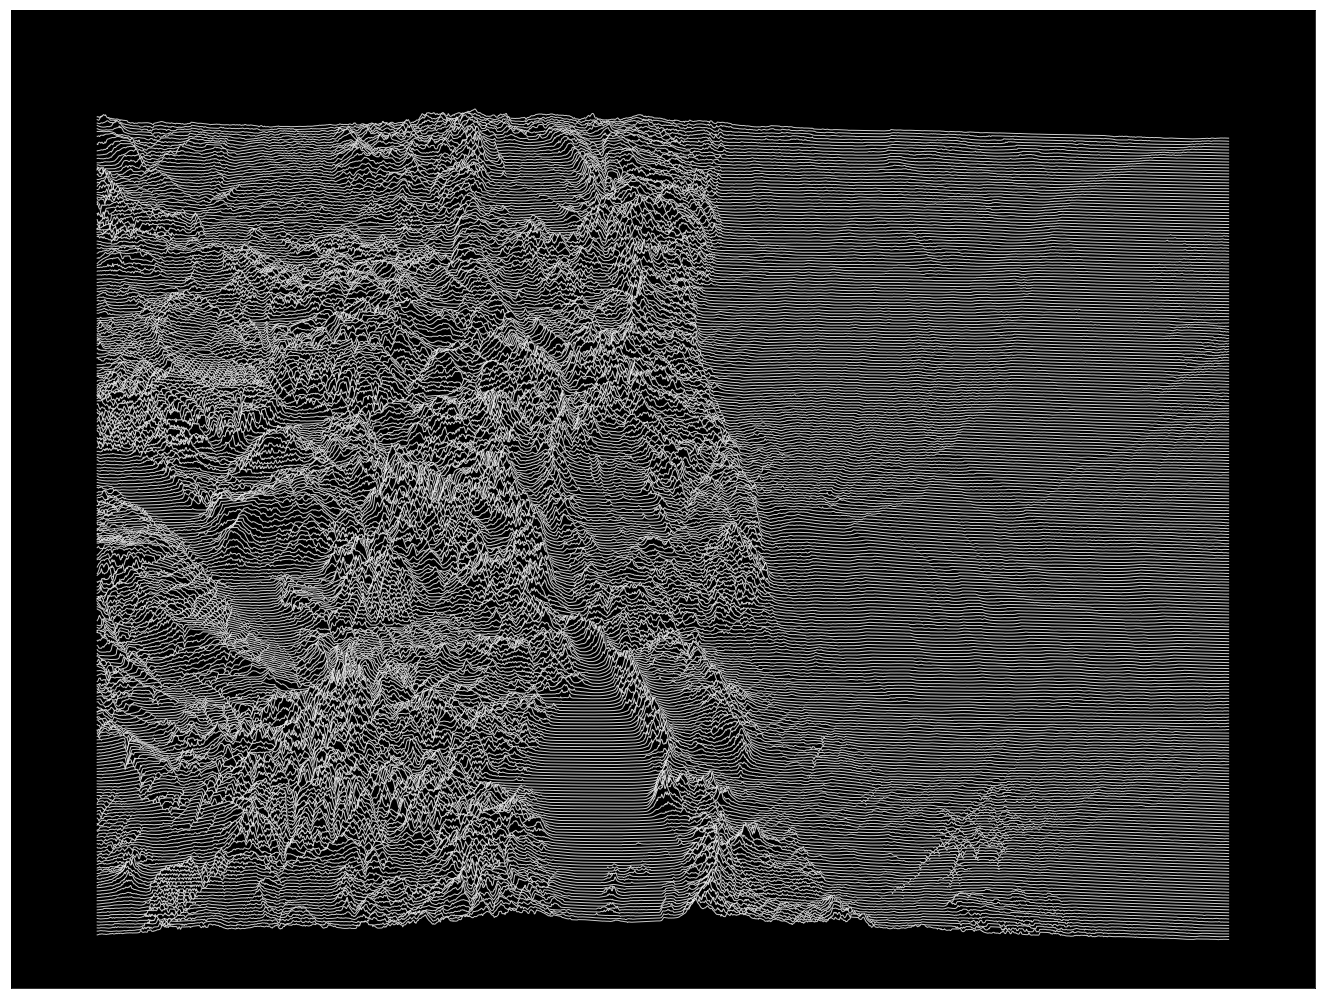

In [64]:
for idx in range(0,scaled.shape[1],1):
    factor = 200
    
    y_plt = scaled[:,idx] + idx * factor
    x_plt = range(y_plt.shape[0])
    #plt.plot(x_plt,y_plt,c='green',alpha=.3)
    plt.plot(x_plt,y_plt,c='white',alpha=.8,zorder=-idx,linewidth=1)
    plt.fill_between(x_plt,y_plt,y2=0, interpolate=True, color='black',zorder=-idx)

fig,ax = plt.gcf(),plt.gca()
ymin,ymax = (-2178, 45743)
ymax += 18000
#ymin -= 5000
ax.set_ylim([ymin,ymax])

xmin,xmax = (-94.6, 1986.6)
xmin -= 50
xmax += 50
ax.set_xlim([xmin,xmax])

ax.set_facecolor(color='black')
zoom = 15
ratio = .77
height = 18
#fig.set_size_inches(zoom,ratio*zoom)
fig.set_size_inches(height/ratio,height)

#_ = plt.axis('off')

_ = ax.get_yaxis().set_ticks([])
_ = ax.get_xaxis().set_ticks([])

plt.savefig('co/factor_200.png',dpi=700)

In [61]:
ax.get_ylim()

(-2178.0, 64743.0)

In [55]:
ax.get_xlim()

(-94.60000000000001, 1986.6)

In [38]:
state.shape[1] / state.shape[0]

0.5714285714285714

In [50]:
fig.get_size_inches()

array([24., 18.])

## Zoom in on Maroon Bells

In [302]:
maroon_bells = 39.097704, -106.944156
maroon_bells = 39.072567, -106.987784

In [303]:
def lat_long_to_xy(latlong):
    lat,long = latlong
    lat_min,lat_max = 37,41
    long_min,long_max = -102,-109
    y_frac = (lat - lat_min) / (lat_max - lat_min)
    x_frac = 1 - (long - long_min) / (long_max - long_min)
    return x_frac,y_frac

In [304]:
x,y = lat_long_to_xy(maroon_bells)

In [305]:
x,y

(0.2874594285714279, 0.5181417499999998)

In [306]:
state.shape

(18921, 10812)

In [307]:
x_point,y_point

(5556, 5670)

In [308]:
x_point = int(x*state.shape[0])
y_point = int(y*state.shape[1])

In [312]:
window = 50
scale = 1

state_small = state[x_point-window:x_point+window:scale,y_point-window:y_point+window:scale]

In [313]:
state_small.shape

(100, 100)

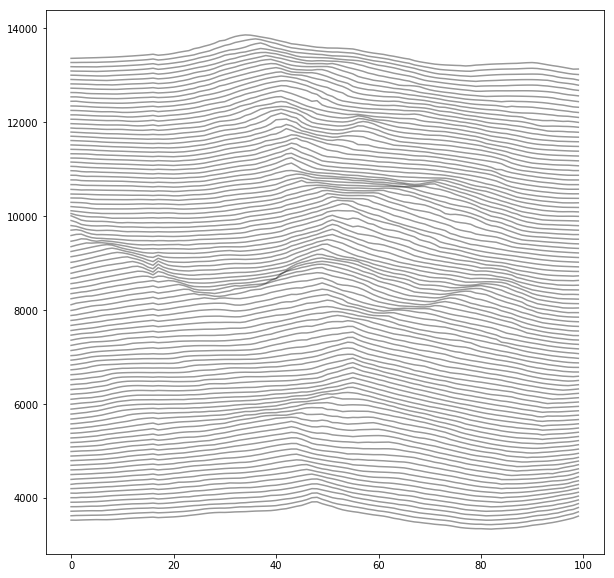

In [314]:
for idx in range(0,state_small.shape[0],1):
    factor = 100
    
    y_plt = state_small[:,idx] + idx * factor
    x_plt = range(y_plt.shape[0])
    #plt.plot(x_plt,y_plt,c='green',alpha=.3)
    plt.plot(x_plt,y_plt,c='black',alpha=.4,zorder=-idx)
    #plt.fill_between(x_plt,y_plt,y2=0, interpolate=True, color='white',zorder=-idx)
    
fig = plt.gcf()
zoom = 2.5
fig.set_size_inches(4*zoom,4*zoom)

In [315]:
x = range(state_small.shape[1])
y = range(state_small.shape[0])
X, Y = np.meshgrid(x, y)
Z = state_small

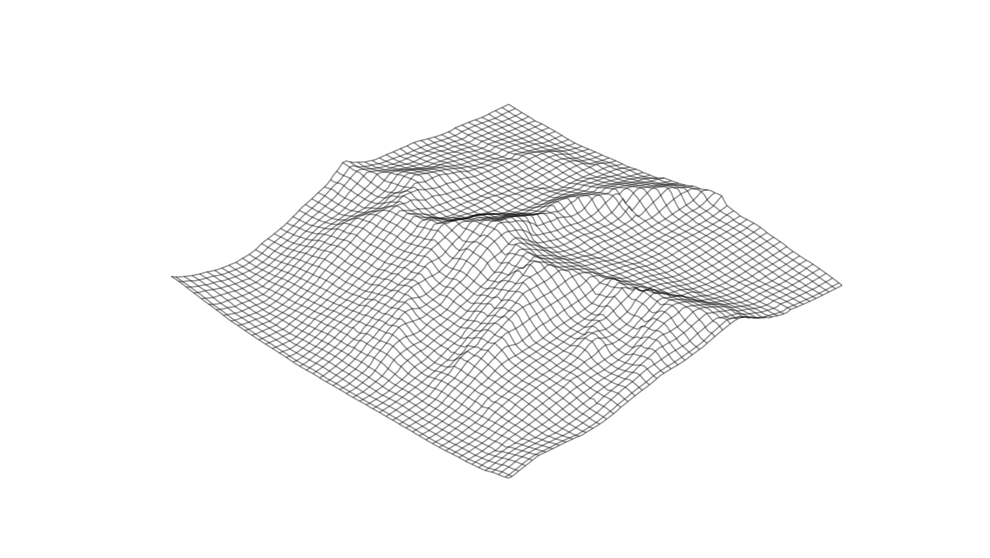

In [323]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(-X, Y, Z, color='black',alpha=.4)

fig = plt.gcf()
zoom = 2.5
fig.set_size_inches(7*zoom,4*zoom)

ax.view_init(75, 135)
_ = plt.axis('off')